<h2> Nauczanie maszynowe/Ćwiczenia5

<h1>Grupowanie danych. K-means

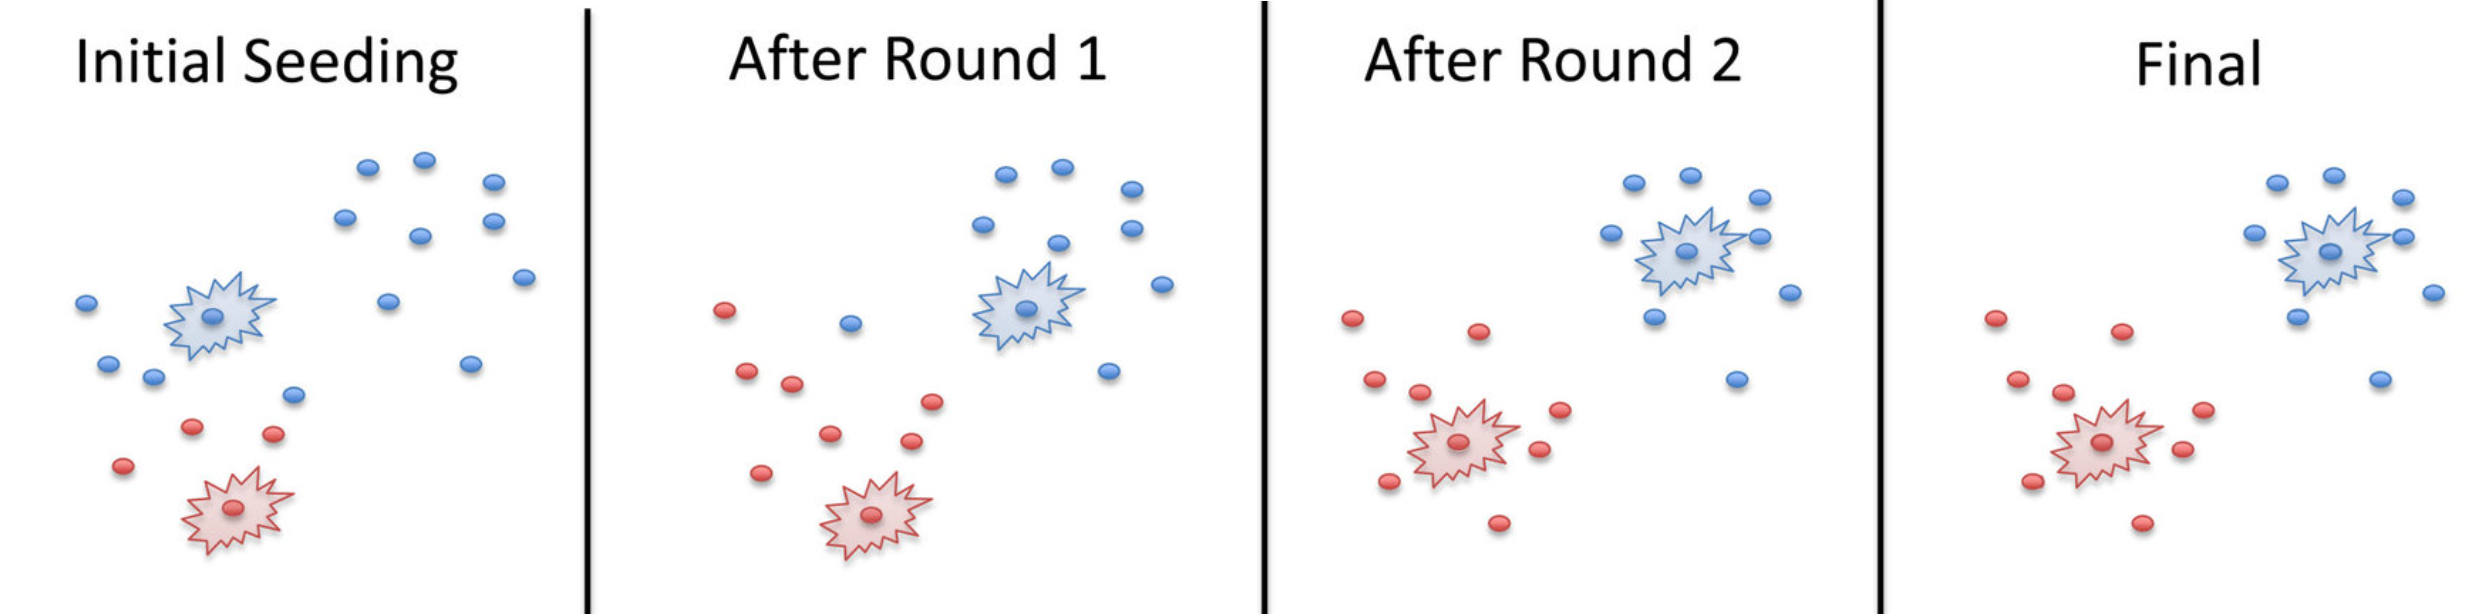

In [2]:
from IPython import display
display.Image("kmeans.png", width="1200", height="700")

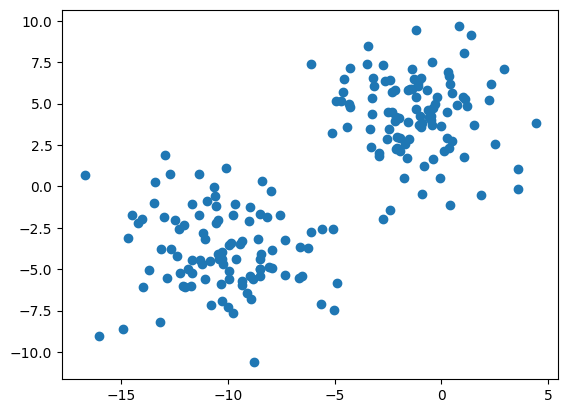

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2) #dane grupujemy w 2 populacje
kmeans.fit(X);

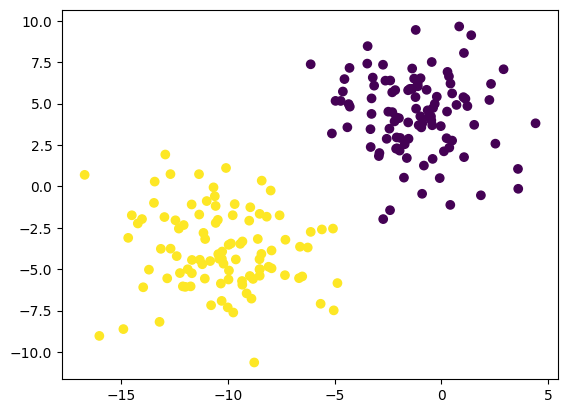

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

In [8]:
kmeans.cluster_centers_ #gdzie są srodki

array([[ -1.17963243,   4.34587916],
       [-10.27744713,  -3.83271163]])

<h4> Co gdy nie wiemy ile grup?

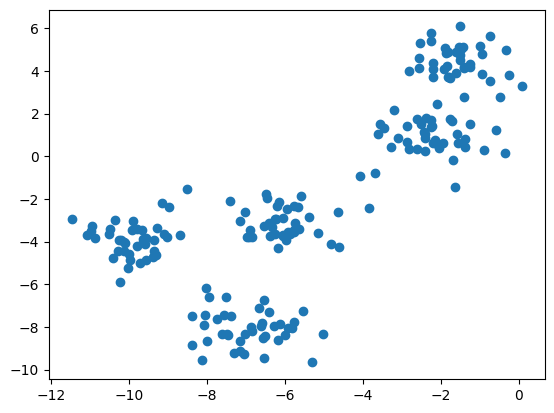

In [9]:
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 5, cluster_std = 0.8)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

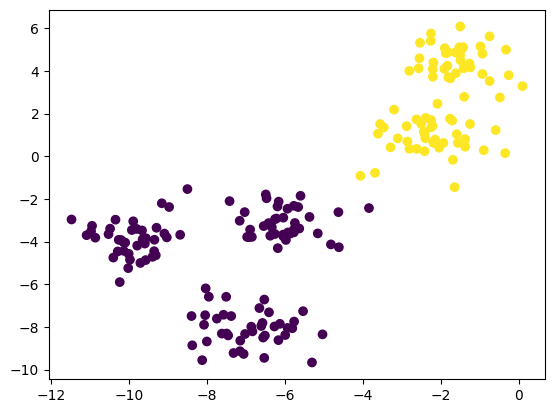

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

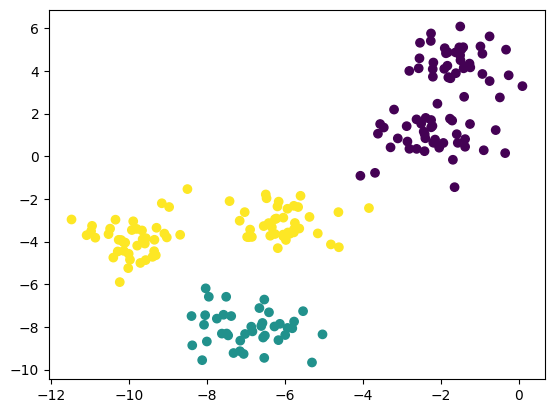

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

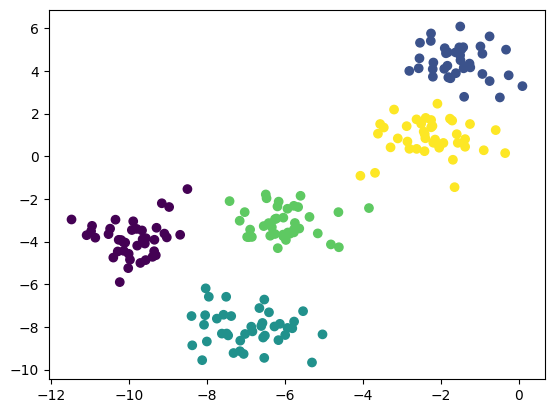

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

In [13]:
from sklearn.mixture import GaussianMixture

def AIC(X, k):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.aic(X);

def BIC(X, k):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.bic(X);

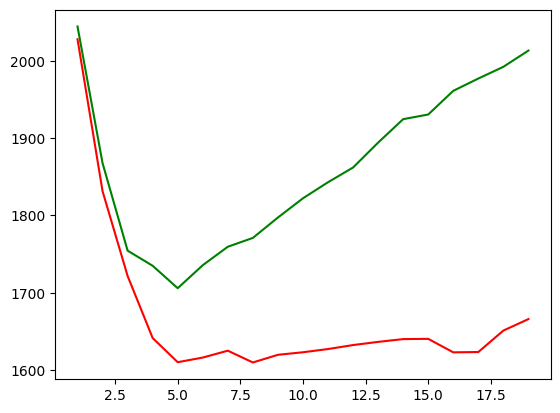

In [14]:
aic = []
bic = []

for i in range(1, 20):
    a, b = AIC(X,i), BIC(X,i)
    aic.append(a)
    bic.append(b)
    
plt.plot(range(1,20), aic, c = "red")
plt.plot(range(1,20), bic, c = "green")

plt.show()
    

<h4> Przykład1: Grupowanie cyfr

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape #1797 probek, zdjecia 8 na 8

(1797, 64)

In [16]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
kmeans = KMeans(n_clusters = 10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape) #10 klastroe 64D

(10, 64)


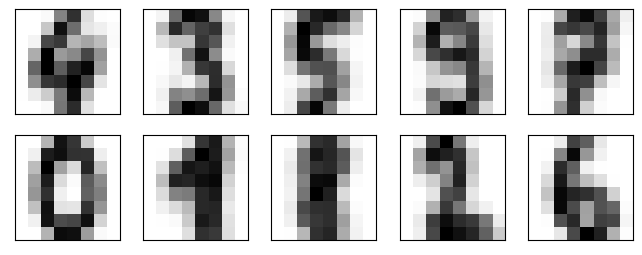

In [18]:
#jak wygladają te centra? Z ktorą cyfra moze byc problem? (8)

fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = "nearest", cmap = plt.cm.binary)

In [19]:
clusters == 1

array([False, False, False, ..., False, False, False])

In [20]:
#bo kmeans arbitralnie nadaje nazwy grupom, nie koniecznie grupa 0 reprezentuje zera

from scipy.stats import mode
import numpy as np

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7935447968836951

Text(77.92222222222227, 0.5, 'predicted label')

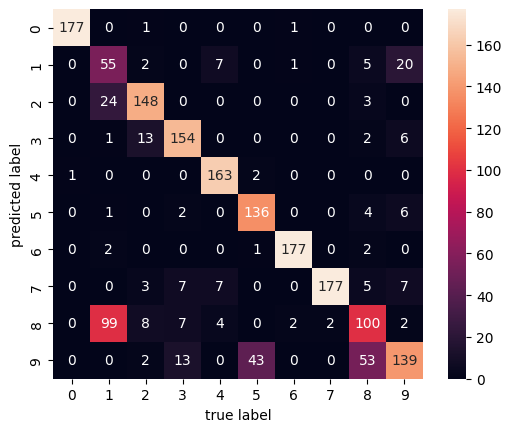

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = True,
            xticklabels = digits.target_names,
            yticklabels = digits.target_names)

plt.xlabel("true label")
plt.ylabel("predicted label")
            

<h4> Przykład2: Kompresja obrazu

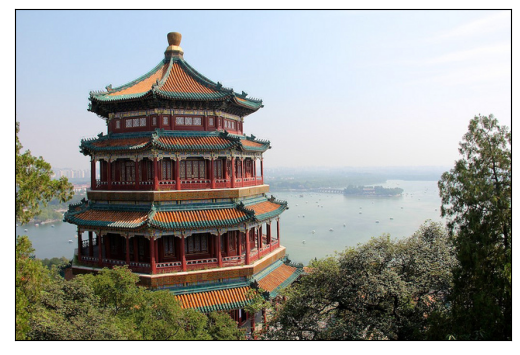

In [23]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [24]:
china.shape #wysokosc/szerokosc/RGB - wplyw czerwonego/niebieskiego/zielonego w skali od 0 do 255

(427, 640, 3)

In [25]:
data = china/255 #skalujemy do 0,1
data = data.reshape(427*640, 3)
data.shape #kazdy piksel charakeryzuje sie 3 liczbami

(273280, 3)

In [26]:
data[0] #przyklad

array([0.68235294, 0.78823529, 0.90588235])

In [27]:
256*256*256 #tyle jest wszystkich mozliwych kolorow, zredukujmy te liczbe do 16 dla naszego zdjecia

16777216

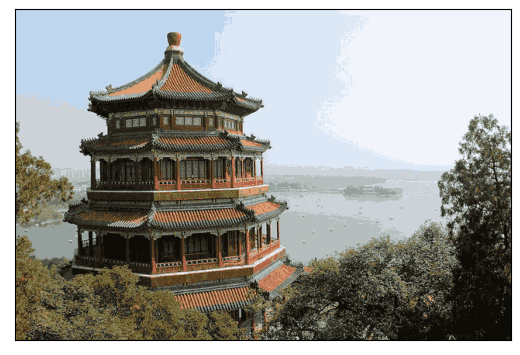

In [28]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
china_recolored = new_colors.reshape(china.shape) #wracamy do orginalnych wymiarow

ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china_recolored);

<h4> Niekuliste kształty

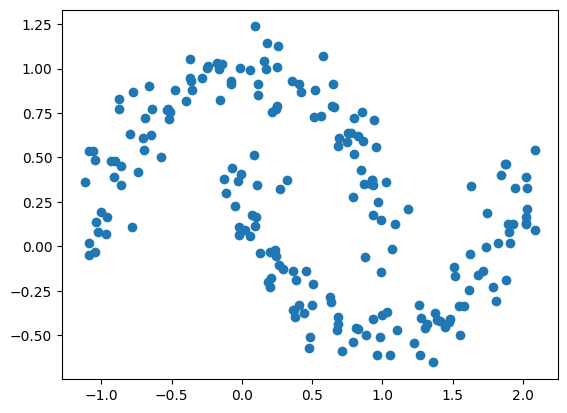

In [29]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=.1, random_state=41)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

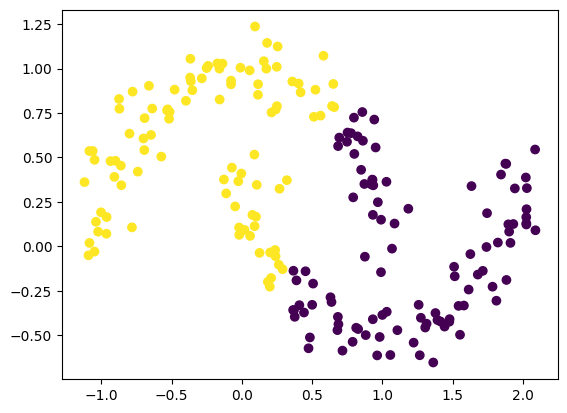

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show() #nie tego bysmy oczekiwali

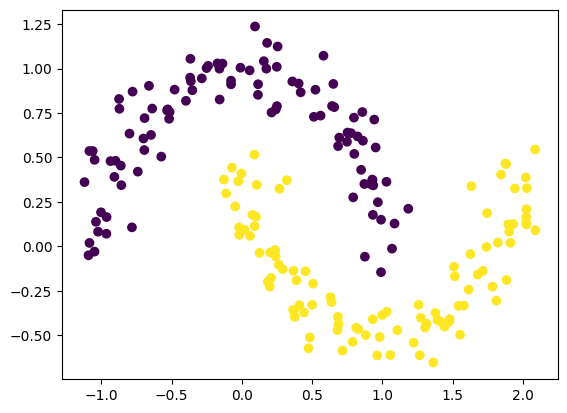

In [31]:
#algorytm DBSCAN 

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.22, min_samples=2)
db.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=db.labels_)
plt.show()

<h4> Zadanie1: Zaimplementuj algorytm grupowania górskiego Zastosuj do poniższych danych.

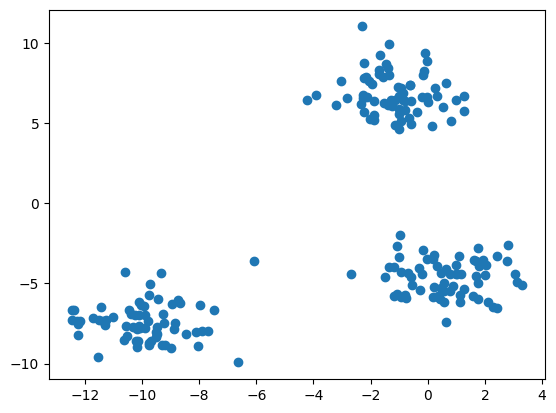

In [32]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [119]:
def matrix_of_density(data):
    x_min,x_max,y_min,y_max = int(min(X[:,0])), int(max(X[:,0]))+1, int(min(X[:,1])), int(max(X[:,1]))+1
    arr = np.zeros([np.abs(y_min) + np.abs(y_max), np.abs(x_min) + np.abs(x_max)])
    print(x_min, y_min)
    for i,j in data:
        print(i, j, int(i + np.abs(x_min)), int(j + np.abs(y_min)))
        arr[int(j + np.abs(y_min))][int(i + np.abs(x_min))] += 1
    return arr
c = matrix_of_density(X)

-12 -9
-8.957109167613819 -6.2584384956791625 3 2
-8.469629124036535 -8.126428668663971 3 0
-10.61327318027781 -8.54472737382987 1 0
-11.301505862797342 -7.594028513498312 0 1
-1.661089605473631 9.283851026102983 10 18
-1.520326580967871 6.243685036309468 10 15
-1.177482611093846 -5.796125506316913 10 3
-10.39172279288531 -6.924884860095965 1 2
-0.9291656214804949 -5.865275470274403 11 3
-0.025358722789068366 6.619181032285545 11 15
-0.9410033564979545 -4.303151341156141 11 4
2.0069045676256207 -4.455889401279036 14 4
-3.034029831727919 7.658124048232619 8 16
-0.6670267785856063 5.354836873660902 11 14
3.066422134009952 -4.4289913772866205 15 4
-2.2237847920053806 5.7161483726593065 9 14
3.1199869481739073 -4.884896318326847 15 4
-1.0945364434376776 -5.685664151375257 10 3
-10.09144102198194 -7.671884356384766 1 1
0.6407038388314983 -4.126610564996019 12 4
-2.3039734429284353 11.053795224573253 9 20
1.8026857150069895 -3.918732853407988 13 5
1.745299248421079 -2.7987449479496798 13 6
-

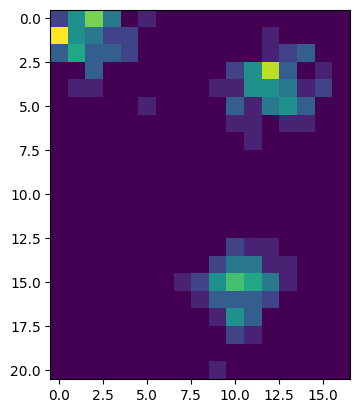

In [118]:
plt.imshow(c)

In [111]:
np.linalg.det(c)

LinAlgError: Last 2 dimensions of the array must be square

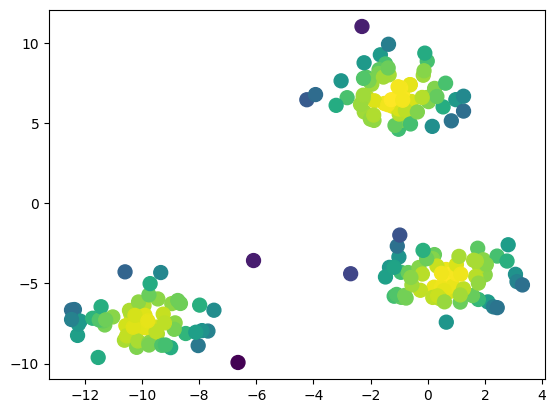

In [39]:
xy = np.vstack([X[:, 0],X[:, 1]])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=z, s=100)
plt.show()

Idea grupowania górskiego

Text(0.5, 0.92, 'surface')

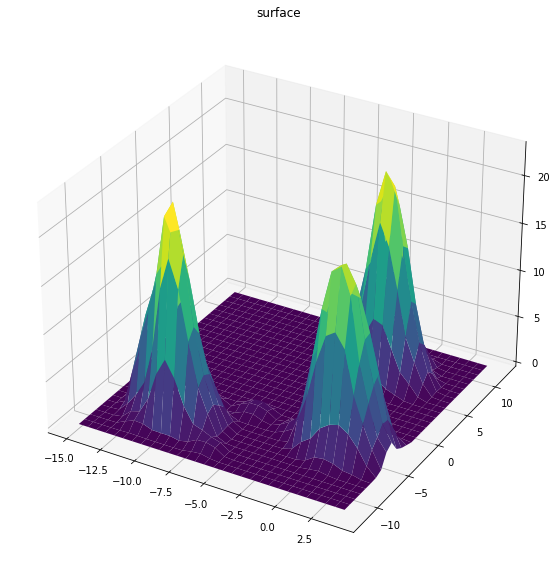

In [30]:
#dane w funkcji gęstosci

Text(0.5, 0.92, 'surface')

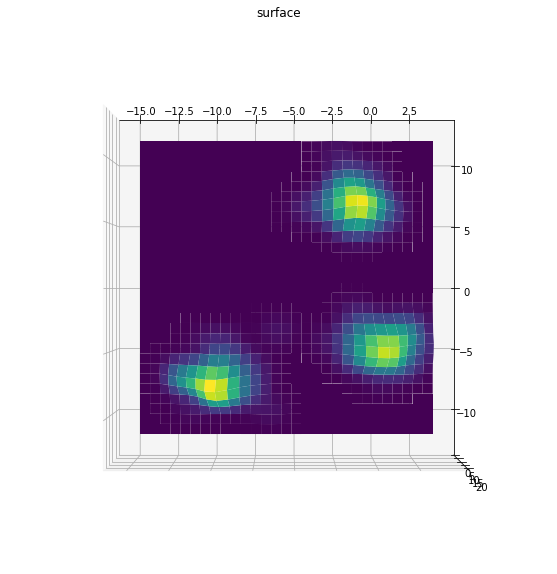

In [31]:
#rzut z gory

Text(0.5, 0.92, 'surface')

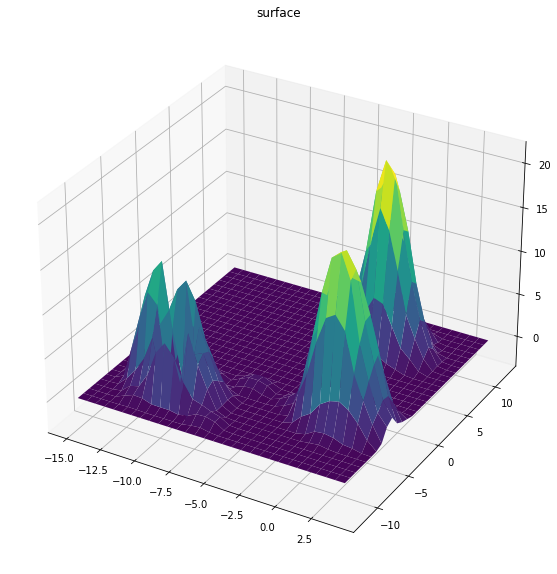

In [32]:
#lokalizujemy najwyzszy punkt --> to będzie pierwsze centrum; obcinamy te górke

Text(0.5, 0.92, 'surface')

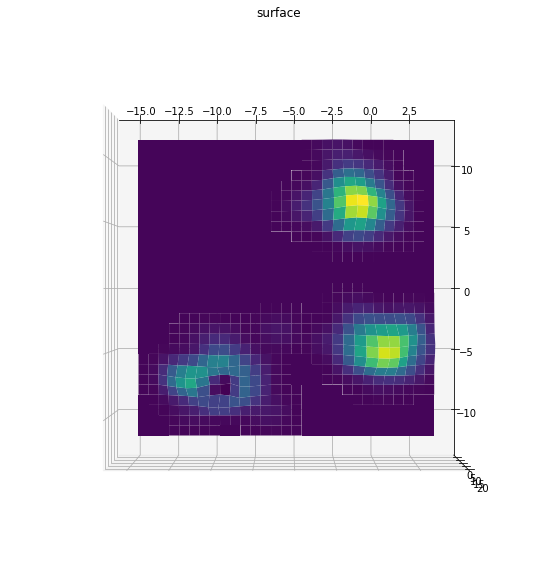

In [33]:
#rzut z gory

Text(0.5, 0.92, 'surface')

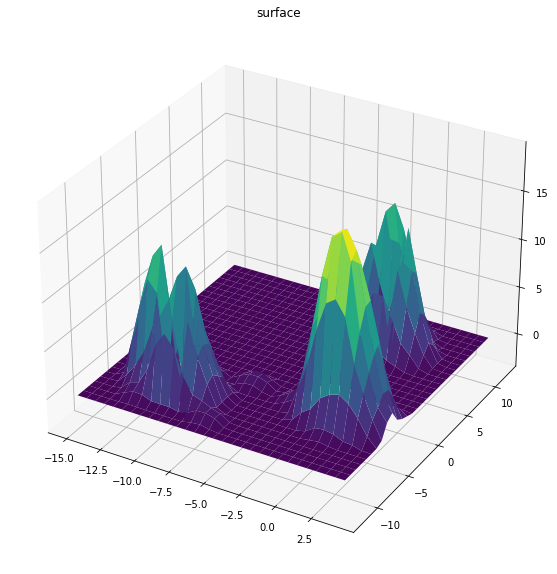

In [34]:
#analogicznie szukamy drugiego centrum

Text(0.5, 0.92, 'surface')

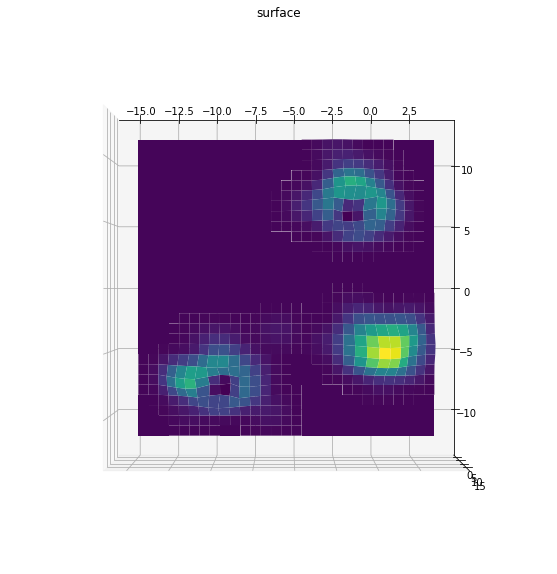

In [35]:
#rzut z gory

Text(0.5, 0.92, 'surface')

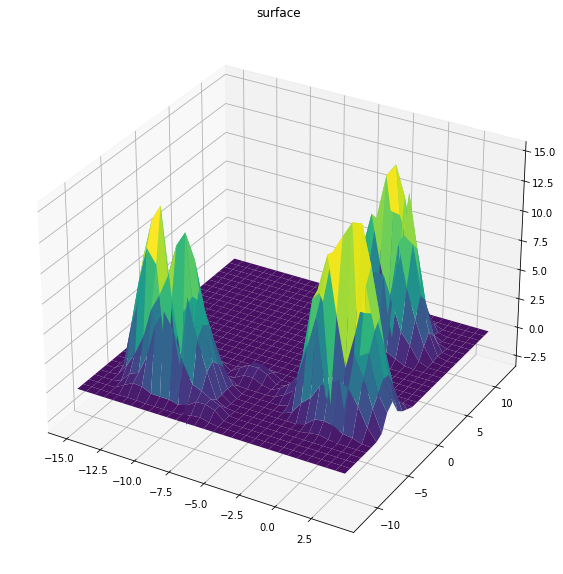

In [36]:
#szukamy trzeciego centrum

Text(0.5, 0.92, 'surface')

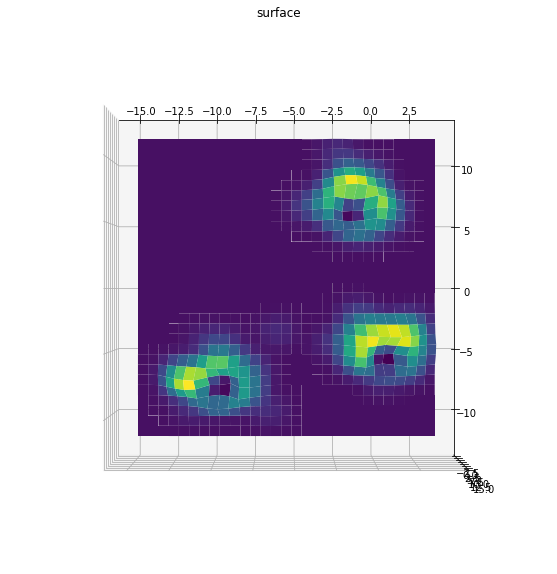

In [37]:
#rzut z gory --> mamy wszystkie centra

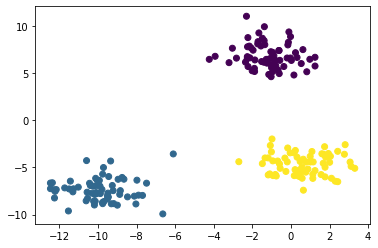

In [38]:
#przypisujemy przynaleznosc punktow 

<h4> Zadanie2: Zaimplementuj algorytm Gustafsona-Kessela. Zastosuj go do poniższych danych - algorytm powinien sobie poradzić z poprawną klasyfikacją.

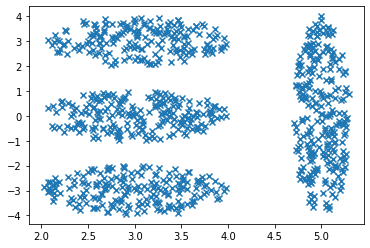

In [39]:

n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

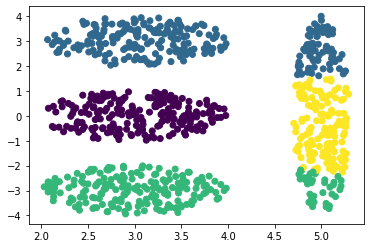

In [40]:
#dla porownania K-means, ktory ma problem z tego typu danymi

kmeans = KMeans(n_clusters=4)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show() 

<h3> Uzupełnienie (grupowanie hierarchiczne)

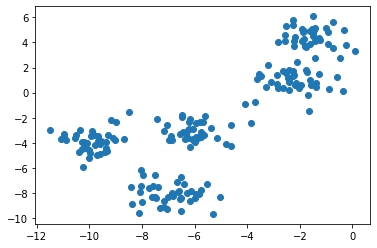

In [41]:
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 5, cluster_std = 0.8)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

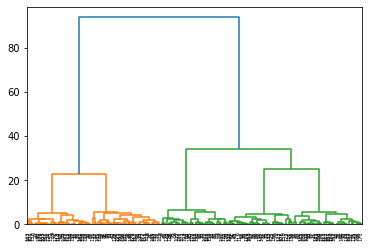

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

<h4> Ćwiczenie: Jakie są inne warianty dla metody i metryki? Zapisz wzory, przetestuj, porównaj.

<h3> Uzupełnienie (numpy)

In [4]:
import numpy as np

v = np.array([3,0,-4])
np.linalg.norm(v) #dlugosc wektora

5.0

In [5]:
A = np.array([[1,0,2],[3,-1,0]])
B = np.array([[1,2],[4,-1],[5,6]])

In [6]:
np.dot(A,B) #mnozenie macierzowe

array([[11, 14],
       [-1,  7]])

In [7]:
A = np.array([[1,2],[3,0]])

np.linalg.inv(A) #macierz odwrotna

array([[ 0.        ,  0.33333333],
       [ 0.5       , -0.16666667]])

In [8]:
np.linalg.det(A) #wyznacznik macierzy

-6.0

In [9]:
np.sum(A) #suma wszystkich elementowe

6

In [10]:
np.sum(A, axis=0) #suma w kolumnach

array([4, 2])

In [11]:
np.sum(A, axis=1) #suma w wierszach

array([3, 3])